<a href="https://colab.research.google.com/github/williammcintosh/CS510_DataEngineering_Assignments/blob/main/10_ethics/10_Ethtics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown 1_uUEUpoEbVLw6p7bva8Bed9H0j_jST_B

Downloading...
From: https://drive.google.com/uc?id=1_uUEUpoEbVLw6p7bva8Bed9H0j_jST_B
To: /content/employees.csv
100% 34.3k/34.3k [00:00<00:00, 69.7MB/s]


In [2]:
! pip install faker

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("employees.csv")

In [4]:
df.head(10)

,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department
0,Jose,Lopez,joselopez0944@slingacademy.com,+1-971-533-4552x1542,male,25,Project Manager,1,8500,Product
1,Diane,Carter,dianecarter1228@slingacademy.com,881.633.0107,female,26,Machine Learning Engineer,2,7000,Product
2,Shawn,Foster,shawnfoster2695@slingacademy.com,001-966-861-0065x493,male,37,Project Manager,14,17000,Product
3,Brenda,Fisher,brendafisher3185@slingacademy.com,001-574-564-4648,female,31,Web Developer,8,10000,Product
4,Sean,Hunter,seanhunter4753@slingacademy.com,5838355842,male,35,Project Manager,11,14500,Product
5,Joshua,Jacobs,joshuajacobs5904@slingacademy.com,053-913-2609,male,28,Project Manager,3,10500,Product
6,Brianna,Marshall,briannamarshall6438@slingacademy.com,701-932-8553,female,33,Machine Learning Engineer,10,11000,Product
7,John,Tate,johntate7881@slingacademy.com,001-889-992-5260x62725,male,33,Mobile Developer,10,11000,Product
8,Jillian,Byrd,jillianbyrd8170@slingacademy.com,077-635-0084x1647,female,34,Web Developer,10,11000,Product
9,Melanie,Sharp,melaniesharp9256@slingacademy.com,(848)212-0230,female,41,Web Developer,15,14500,Product


<Axes: xlabel='Salary'>

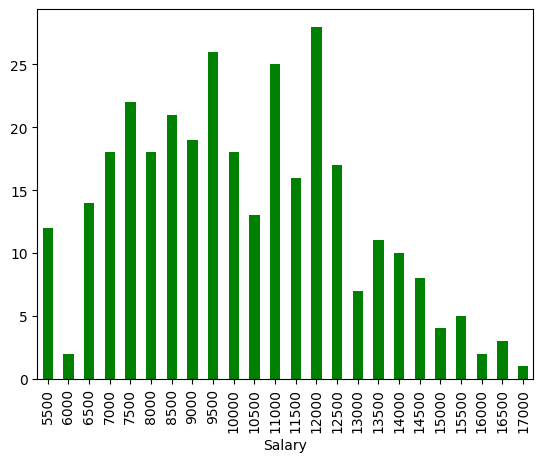

In [5]:
df['Salary'].value_counts().sort_index().plot(kind='bar', color='green')

## Salaries in Months

Looks like these salaries are calculated in months.

In [6]:
# B. Sampling with Bias
def biased_sample(df):
    fdf = df.copy()
    fdf['age_group'] = pd.cut(fdf['Age'], bins=[0, 38, 39, 49, 50, 100], labels=[0, 1, 2, 3, 4], right=False)
    fdf['weights'] = fdf['age_group'].replace({0: 1.0, 1: 1.0, 2: 4.0, 3: 1.0, 4: 1.0})
    sample = fdf.sample(n=20, weights='weights', random_state=42)
    sample.drop(columns=['age_group', 'weights'], inplace=True)
    return sample

# C. Anonymization
def anonymize_data(df):
    fdf = df.copy()
    fdf['First Name'] = fdf['First Name'].apply(lambda x: hash(x))
    fdf['Last Name'] = fdf['Last Name'].apply(lambda x: hash(x))
    fdf['Email'] = fdf['Email'].apply(lambda x: hash(x))
    fdf['Phone'] = fdf['Phone'].apply(lambda x: hash(x))
    return fdf

# D. Perturbation with Gaussian Noise
def perturb_data(df):
    fdf = df.copy()
    # Standard deviations (example values, these should be chosen based on your data's range/variance)
    std_age = 1.0
    std_salary = 5000.0
    std_experience = 1.0

    fdf['Age'] = fdf['Age'].apply(lambda x: x + np.random.normal(0, std_age))
    fdf['Salary'] = fdf['Salary'].apply(lambda x: x + np.random.normal(0, std_salary))
    fdf['Years Of Experience'] = fdf['Years Of Experience'].apply(lambda x: x + np.random.normal(0, std_experience))

    return fdf

In [7]:
df.shape

(320, 10)

<Axes: xlabel='Age'>

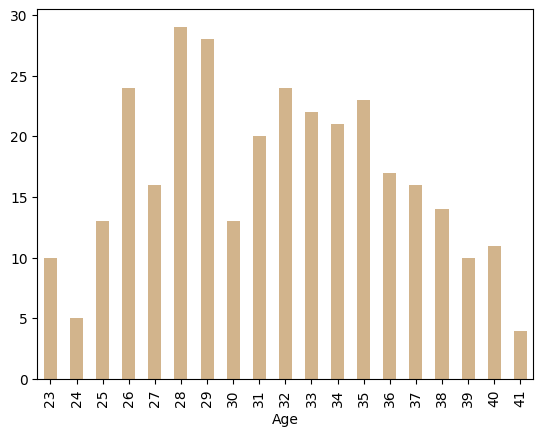

In [8]:
df['Age'].value_counts().sort_index().plot(kind='bar', color='tan')

# B. Biased Sample

In [9]:
sampled_df = biased_sample(df)
print(f"\n\n{sampled_df.shape=}\n")
sampled_df.head(10)



sampled_df.shape=(20, 10)



,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department
114,Gregory,Kirk,gregorykirk114408@slingacademy.com,(622)794-0249x585,male,39,Machine Learning Engineer,13,11500,Product
306,Danielle,Sparks,daniellesparks306675@slingacademy.com,(670)805-6201x50813,female,26,Web Developer,2,8000,Product
229,Eddie,Riley,eddieriley229421@slingacademy.com,+1-976-524-6785,male,25,Mobile Developer,1,7500,Product
185,Michael,Galvan,michaelgalvan185989@slingacademy.com,+1-122-284-2113,male,28,Web Developer,2,8000,Product
52,Jason,Boyd,jasonboyd52182@slingacademy.com,001-199-903-4307x52539,male,39,Designer,14,15000,Product
16,Nicole,Smith,nicolesmith16360@slingacademy.com,289.372.5080x2156,female,26,Designer,4,10000,Product
282,Charles,West,charleswest282127@slingacademy.com,524-024-2894x074,male,26,Web Developer,2,8000,Product
186,Michael,Warner,michaelwarner186194@slingacademy.com,790-287-4075,male,29,Mobile Developer,5,7500,Product
222,Michael,Pratt,michaelpratt222638@slingacademy.com,001-149-139-6964,male,38,Mobile Developer,12,12000,Product
8,Jillian,Byrd,jillianbyrd8170@slingacademy.com,077-635-0084x1647,female,34,Web Developer,10,11000,Product


<Axes: xlabel='Age'>

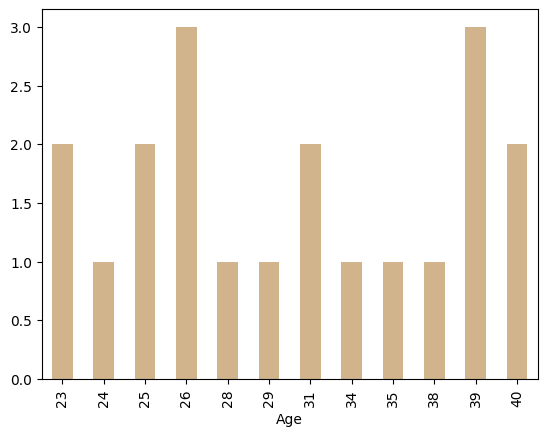

In [10]:
sampled_df['Age'].value_counts().sort_index().plot(kind='bar', color='tan')

# C. Anonymized

Systematically change the names

In [11]:
anonymized_df = anonymize_data(sampled_df)
anonymized_df.head(10)

,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department
114,4393625390128698851,4387725337542742351,1023866658688478251,-3066532837100290344,male,39,Machine Learning Engineer,13,11500,Product
306,-8442619924142601169,-1394951485486561113,6073995057571069851,7120313150899711570,female,26,Web Developer,2,8000,Product
229,-5579788096918675528,2792649405253931294,8538368432550118971,2108239838786112146,male,25,Mobile Developer,1,7500,Product
185,-4893865832598899061,3771786640846578929,3253991665751325092,-5196901923736111712,male,28,Web Developer,2,8000,Product
52,2063459458923908530,-4972007852729567929,-7233130027272198191,5088719323130514951,male,39,Designer,14,15000,Product
16,674497897022979647,7235858257978037538,-1552426665629328232,-5622140270837563728,female,26,Designer,4,10000,Product
282,3452751507884330355,3319281907048874850,-5215276553332020852,-475533335173405170,male,26,Web Developer,2,8000,Product
186,-4893865832598899061,2845741082281447465,-2537958055310679700,963645498250851279,male,29,Mobile Developer,5,7500,Product
222,-4893865832598899061,451590478997412045,-6749959797873042347,8813938745029318187,male,38,Mobile Developer,12,12000,Product
8,-285127793273212711,1105646856549200215,9068956790989439322,5755852227681283245,female,34,Web Developer,10,11000,Product


# D. Pertrubed

Add noise to numerical columns

In [12]:
perturbed_df = perturb_data(anonymized_df)
perturbed_df.head(10)

,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department
114,4393625390128698851,4387725337542742351,1023866658688478251,-3066532837100290344,male,39.320327,Machine Learning Engineer,11.304863,7951.939010,Product
306,-8442619924142601169,-1394951485486561113,6073995057571069851,7120313150899711570,female,25.448224,Web Developer,1.254000,9513.502621,Product
229,-5579788096918675528,2792649405253931294,8538368432550118971,2108239838786112146,male,25.380452,Mobile Developer,1.130595,8186.401066,Product
185,-4893865832598899061,3771786640846578929,3253991665751325092,-5196901923736111712,male,27.848261,Web Developer,3.702918,17592.497533,Product
52,2063459458923908530,-4972007852729567929,-7233130027272198191,5088719323130514951,male,39.811197,Designer,13.338846,15748.901868,Product
16,674497897022979647,7235858257978037538,-1552426665629328232,-5622140270837563728,female,24.618595,Designer,5.344836,4591.708624,Product
282,3452751507884330355,3319281907048874850,-5215276553332020852,-475533335173405170,male,25.553046,Web Developer,0.995535,-65.093671,Product
186,-4893865832598899061,2845741082281447465,-2537958055310679700,963645498250851279,male,30.675133,Mobile Developer,4.720650,19135.424732,Product
222,-4893865832598899061,451590478997412045,-6749959797873042347,8813938745029318187,male,38.385262,Mobile Developer,12.434184,11942.773297,Product
8,-285127793273212711,1105646856549200215,9068956790989439322,5755852227681283245,female,33.260287,Web Developer,10.531267,7193.625795,Product


In [13]:
import pandas as pd
from faker import Faker
import random

# Load the original dataframe (assuming it's already loaded as df)
# df = pd.read_csv('employees.csv')

fake = Faker()

# Generate a unique SSN
def generate_unique_ssn(existing_ssns):
    ssn = fake.ssn()
    while ssn in existing_ssns:
        ssn = fake.ssn()
    existing_ssns.add(ssn)
    return ssn

# Function to generate additional languages
def generate_languages():
    languages = ['Spanish', 'Mandarin', 'Hindi', 'French', 'German', 'Korean', 'Tagalog']
    num_languages = random.choice([0, 1, 2])
    return ', '.join(random.sample(languages, num_languages))

# Define country proportions based on 2019 H1B data
country_proportions = {
    'India': 0.7270,
    'China': 0.1310,
    'Canada': 0.0210,
    'South Korea': 0.0190,
    'Philippines': 0.0180,
    'Taiwan': 0.0120,
    'Mexico': 0.0120,
}

# Generate country based on proportions
def generate_country():
    return random.choices(
        population=list(country_proportions.keys()),
        weights=list(country_proportions.values()),
        k=1
    )[0]

# Ensure all original employees have SSNs
existing_ssns = set()

# Add SSN column to the original DataFrame
df['SSN'] = [generate_unique_ssn(existing_ssns) for _ in range(len(df))]

# Add Languages and Country columns to the original DataFrame
df['Languages'] = [generate_languages() for _ in range(len(df))]
df['Country'] = [generate_country() for _ in range(len(df))]

# Define department proportions
department_proportions = {
    'Legal': 0.05,
    'Marketing': 0.10,
    'Administrative': 0.10,
    'Operations': 0.20,
    'Sales': 0.10,
    'Finance': 0.05,
    'I/T': 0.10,
    'Product': 0.20,
    'Human Resource': 0.10
}

# Generate department based on proportions
def generate_department():
    return random.choices(
        population=list(department_proportions.keys()),
        weights=list(department_proportions.values()),
        k=1
    )[0]

salary_ranges = {
    'Legal': (150942, 194400),          # https://www.salary.com/research/salary/listing/legal-counsel-salary
    'Marketing': (68443, 91634),        # https://www.salary.com/research/salary/recruiting/marketing-consultant-salary
    'Administrative': (45503, 58089),   # https://www.salary.com/research/salary/position/administrative-consultant-salary
    'Operations': (81313, 103050),      # https://www.salary.com/research/salary/position/strategy-and-operations-consultant-salary
    'Sales': (86220, 116836),           # https://www.salary.com/research/salary/position/sales-consultant-salary
    'Finance': (62221, 92146),          # https://www.salary.com/research/salary/listing/financial-consultant-salary
    'I/T': (89915, 113337),             # https://www.salary.com/research/salary/listing/it-business-consultant-salary
    'Product': (153029, 189914),        # https://www.salary.com/research/salary/recruiting/product-consultant-salary
    'Human Resource': (119644, 151503)  # https://www.salary.com/research/salary/posting/human-resources-consultant-salary
}

# Generate employee function
def generate_employee(existing_ssns):
    department = generate_department()
    salary_min, salary_max = salary_ranges[department]

    # Calculate the monthly salary
    yearly_salary = random.randint(salary_min, salary_max)
    monthly_salary = round(yearly_salary / 12)

    return {
        'First Name': fake.first_name(),
        'Last Name': fake.last_name(),
        'Email': fake.email(),
        'Phone': fake.phone_number(),
        'Gender': random.choice(['male', 'female']),
        'Age': random.randint(20, 65),
        'Job Title': random.choice(['Project Manager', 'Machine Learning Engineer', 'Web Developer',
                                    'Mobile Developer', 'DevOps Engineer', 'Designer', 'Tester']),
        'Years Of Experience': random.randint(0, 40),
        'Salary': monthly_salary,
        'Department': department, #Use the generated department above
        'SSN': generate_unique_ssn(existing_ssns),
        'Languages': generate_languages(),
        'Country': generate_country()
    }

# Generate 9680 new employees (10000 total - 320 existing)
new_employees = [generate_employee(existing_ssns) for _ in range(9680)]

# Create a DataFrame for the new employees
new_df = pd.DataFrame(new_employees)

# Concatenate the original and new DataFrames
expanded_df = pd.concat([df, new_df], ignore_index=True)

In [14]:
print(f"\n\n{expanded_df.shape=}\n")
expanded_df.head()



expanded_df.shape=(10000, 13)



,First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department,SSN,Languages,Country
0,Jose,Lopez,joselopez0944@slingacademy.com,+1-971-533-4552x1542,male,25,Project Manager,1,8500,Product,354-03-4009,,Taiwan
1,Diane,Carter,dianecarter1228@slingacademy.com,881.633.0107,female,26,Machine Learning Engineer,2,7000,Product,424-06-8862,French,India
2,Shawn,Foster,shawnfoster2695@slingacademy.com,001-966-861-0065x493,male,37,Project Manager,14,17000,Product,427-04-6986,Tagalog,Taiwan
3,Brenda,Fisher,brendafisher3185@slingacademy.com,001-574-564-4648,female,31,Web Developer,8,10000,Product,542-36-2718,"Korean, German",India
4,Sean,Hunter,seanhunter4753@slingacademy.com,5838355842,male,35,Project Manager,11,14500,Product,661-05-7525,,India


In [15]:
pd.DataFrame(expanded_df.value_counts(['Languages'])).T

Languages,,Tagalog,German,Spanish,Hindi,French,Mandarin,Korean,"Tagalog, Spanish","Hindi, Tagalog",...,"Mandarin, Hindi","Spanish, Hindi","German, Tagalog","Spanish, German","Korean, German","Spanish, Tagalog","French, Hindi","German, Mandarin","Hindi, Spanish","Mandarin, French"
count,3248,500,496,491,474,473,455,443,102,99,...,76,75,73,71,70,67,67,67,65,61


<Axes: xlabel='Age'>

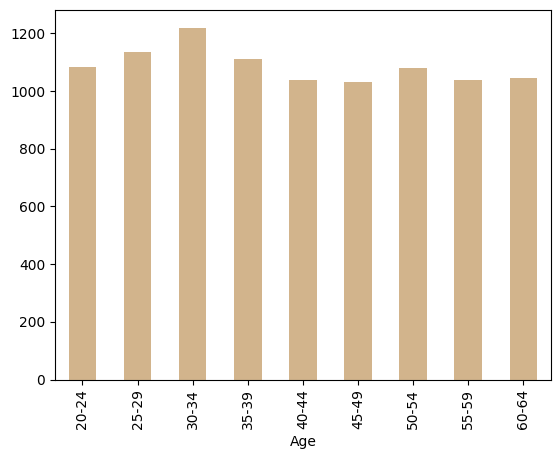

In [16]:
expanded_df['Age'].pipe(lambda s: pd.cut(s, bins=range(20, 70, 5), labels=[f'{i}-{i+4}' for i in range(20, 65, 5)], right=False)).value_counts().sort_index().plot(kind='bar', color='tan')

# A. Biased Sample (Again)

<Axes: xlabel='Age'>

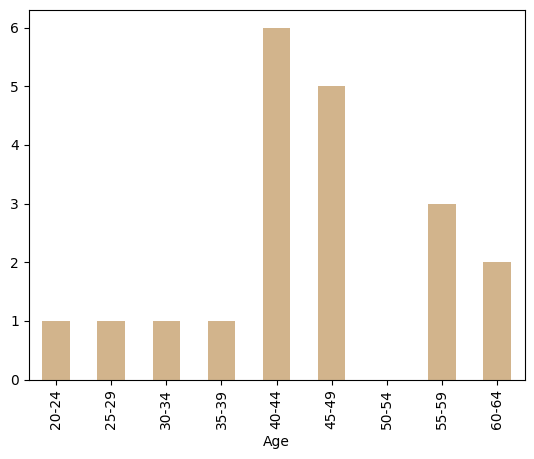

In [17]:
expanded_sample_df = biased_sample(expanded_df)
expanded_sample_df['Age'].pipe(lambda s: pd.cut(s, bins=range(20, 70, 5), labels=[f'{i}-{i+4}' for i in range(20, 65, 5)], right=False)).value_counts().sort_index().plot(kind='bar', color='tan')

In [18]:
expanded_df.head(10).to_csv()

',First Name,Last Name,Email,Phone,Gender,Age,Job Title,Years Of Experience,Salary,Department,SSN,Languages,Country\n0,Jose,Lopez,joselopez0944@slingacademy.com,+1-971-533-4552x1542,male,25,Project Manager,1,8500,Product,354-03-4009,,Taiwan\n1,Diane,Carter,dianecarter1228@slingacademy.com,881.633.0107,female,26,Machine Learning Engineer,2,7000,Product,424-06-8862,French,India\n2,Shawn,Foster,shawnfoster2695@slingacademy.com,001-966-861-0065x493,male,37,Project Manager,14,17000,Product,427-04-6986,Tagalog,Taiwan\n3,Brenda,Fisher,brendafisher3185@slingacademy.com,001-574-564-4648,female,31,Web Developer,8,10000,Product,542-36-2718,"Korean, German",India\n4,Sean,Hunter,seanhunter4753@slingacademy.com,5838355842,male,35,Project Manager,11,14500,Product,661-05-7525,,India\n5,Joshua,Jacobs,joshuajacobs5904@slingacademy.com,053-913-2609,male,28,Project Manager,3,10500,Product,651-86-6413,,India\n6,Brianna,Marshall,briannamarshall6438@slingacademy.com,701-932-8553,female,33,Machine Learning En

In [19]:
# Determine who speaks more than one language
languages_df = pd.DataFrame()
languages_df['LanguageCount'] = expanded_df['Languages'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) and x else 0)
more_than_one = languages_df['LanguageCount'] > 1

# Calculate the ratios
ratio_more_than_one = more_than_one.sum() / len(languages_df)
ratio_one_or_none = 1 - ratio_more_than_one

pd.DataFrame({
    'Multilingual': [ratio_more_than_one],
    'English Only': [ratio_one_or_none]
})

,Multilingual,English Only
0,0.342,0.658


<Axes: xlabel='Salary'>

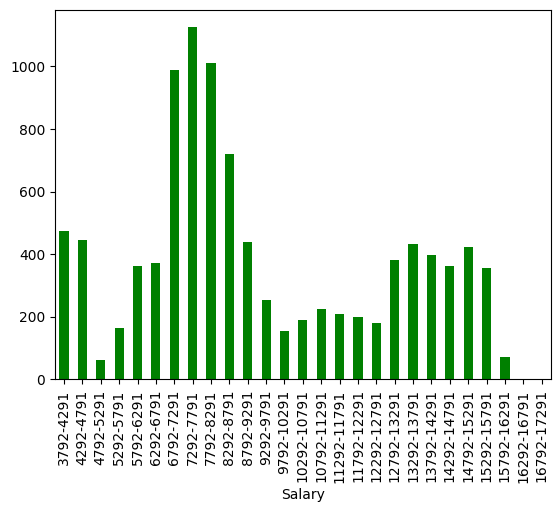

In [20]:
salary_min = int(expanded_df['Salary'].describe()['min'])
salary_max = int(expanded_df['Salary'].describe()['max'])
salary_bins = range(salary_min, salary_max + 500, 500)

# Generate labels for the bins
labels = [f'{i}-{i+499}' for i in salary_bins[:-1]]  # Use the range excluding the last edge

expanded_df['Salary'].pipe(
    lambda s: pd.cut(s, bins=salary_bins, labels=labels, right=False)
).value_counts().sort_index().plot(kind='bar', color='green')

<Axes: xlabel='Gender'>

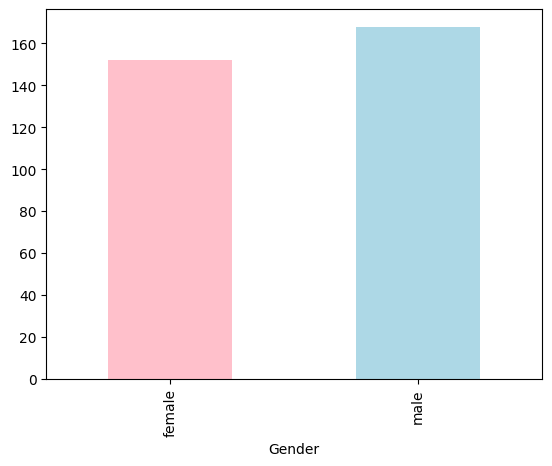

In [26]:
df['Gender'].value_counts().sort_index().plot(kind='bar', color=['pink', 'lightblue'])

<Axes: xlabel='Gender'>

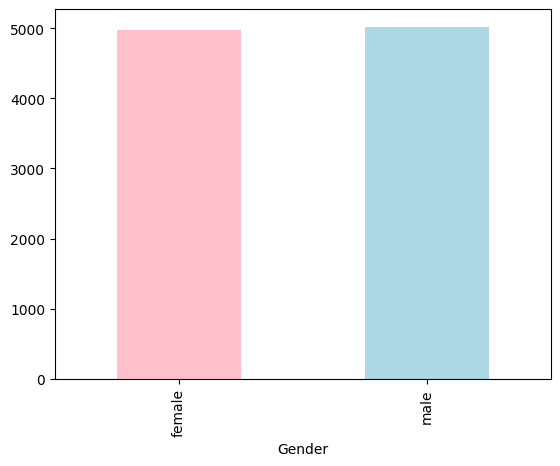

In [25]:
expanded_df['Gender'].value_counts().sort_index().plot(kind='bar', color=['pink', 'lightblue'])

# G.  Analyze the Synthetic Company Data

In [38]:
import pandas as pd

# Assuming expanded_df is already loaded

# Get the current count of men and women in each department
current_gender_counts = expanded_df.groupby(['Department', 'Gender']).size().unstack(fill_value=0)

# Calculate the total count of employees in each department
current_gender_counts['Total'] = current_gender_counts.sum(axis=1)

# Calculate the current ratio of men and women in each department
current_gender_counts['Current Male Ratio'] = current_gender_counts['male'] / current_gender_counts['Total']
current_gender_counts['Current Female Ratio'] = current_gender_counts['female'] / current_gender_counts['Total']

# Determine the total number needed to reach a 50/50 ratio
desired_total = current_gender_counts['Total']

# Calculate the number of men and women needed to hire to reach the 50/50 ratio
hiring_needs = pd.DataFrame(index=current_gender_counts.index)
hiring_needs['Current Number of Men'] = current_gender_counts['male']
hiring_needs['Current Number of Women'] = current_gender_counts['female']
hiring_needs['Current Male Ratio'] = current_gender_counts['Current Male Ratio']
hiring_needs['Current Female Ratio'] = current_gender_counts['Current Female Ratio']
hiring_needs['Men Hiring Need'] = ((desired_total / 2) - current_gender_counts['male']) * 2.0
hiring_needs['Women Hiring Need'] = ((desired_total / 2) - current_gender_counts['female']) * 2.0

# Ensure no negative values
hiring_needs['Men Hiring Need'] = hiring_needs['Men Hiring Need'].apply(lambda x: max(x, 0))
hiring_needs['Women Hiring Need'] = hiring_needs['Women Hiring Need'].apply(lambda x: max(x, 0))

# Calculate future projected ratios after hiring
hiring_needs['Future Number of Men'] = hiring_needs['Current Number of Men'] + hiring_needs['Men Hiring Need']
hiring_needs['Future Number of Women'] = hiring_needs['Current Number of Women'] + hiring_needs['Women Hiring Need']
hiring_needs['Future Total'] = hiring_needs['Future Number of Men'] + hiring_needs['Future Number of Women']
hiring_needs['Future Male Ratio'] = hiring_needs['Future Number of Men'] / hiring_needs['Future Total']
hiring_needs['Future Female Ratio'] = hiring_needs['Future Number of Women'] / hiring_needs['Future Total']

# Drop unnecessary columns
hiring_needs = hiring_needs.drop(columns=['Future Total'])

# Rename columns for clarity
hiring_needs.columns = [
    'Current Number of Men',
    'Current Number of Women',
    'Current Male Ratio',
    'Current Female Ratio',
    'Men Hiring Need',
    'Women Hiring Need',
    'Future Number of Men',
    'Future Number of Women',
    'Future Male Ratio',
    'Future Female Ratio'
]

# import ace_tools as tools; tools.display_dataframe_to_user(name="Gender Hiring Needs and Projections by Department", dataframe=hiring_needs)

hiring_needs


,Current Number of Men,Current Number of Women,Current Male Ratio,Current Female Ratio,Men Hiring Need,Women Hiring Need,Future Number of Men,Future Number of Women,Future Male Ratio,Future Female Ratio
Department,,,,,,,,,,
Administrative,478,479,0.499478,0.500522,1.0,0.0,479.0,479.0,0.5,0.5
Finance,262,244,0.517787,0.482213,0.0,18.0,262.0,262.0,0.5,0.5
Human Resource,511,485,0.513052,0.486948,0.0,26.0,511.0,511.0,0.5,0.5
I/T,456,448,0.504425,0.495575,0.0,8.0,456.0,456.0,0.5,0.5
Legal,214,259,0.452431,0.547569,45.0,0.0,259.0,259.0,0.5,0.5
Marketing,482,473,0.504712,0.495288,0.0,9.0,482.0,482.0,0.5,0.5
Operations,978,979,0.499745,0.500255,1.0,0.0,979.0,979.0,0.5,0.5
Product,1141,1128,0.502865,0.497135,0.0,13.0,1141.0,1141.0,0.5,0.5
Sales,501,482,0.509664,0.490336,0.0,19.0,501.0,501.0,0.5,0.5


In [40]:
# Calculate the current total annual salary
current_total_salary = expanded_df['Salary'].sum() * 12

# Calculate the average salary per department
average_salaries = expanded_df.groupby('Department')['Salary'].mean()

# Calculate the total number of new hires needed in each department
hiring_needs['Total Hiring Need'] = hiring_needs['Men Hiring Need'] + hiring_needs['Women Hiring Need']

# Calculate the projected annual salary for new hires in each department
hiring_needs['Projected Annual Salary for New Hires'] = hiring_needs.index.map(
    lambda dept: hiring_needs.loc[dept, 'Total Hiring Need'] * average_salaries[dept] * 12
)

# Calculate the total projected annual salary for new hires
projected_total_salary_for_new_hires = hiring_needs['Projected Annual Salary for New Hires'].sum()

# Calculate the total projected annual payroll for the new company
total_projected_annual_payroll = current_total_salary + projected_total_salary_for_new_hires

# Format the total projected annual payroll with commas
formatted_total_payroll = f"{total_projected_annual_payroll:,.2f}"

# Print the formatted result
print(f"Total projected annual payroll for the new company: ${formatted_total_payroll}")

Total projected annual payroll for the new company: $1,142,976,182.33


In [41]:
# Calculate the average annual salary per employee
average_annual_salary_per_employee = total_projected_annual_payroll / len(expanded_df)

# Format the result
formatted_average_salary = f"{average_annual_salary_per_employee:,.2f}"

# Print the formatted result
print(f"Average annual salary per employee: ${formatted_average_salary}")

Average annual salary per employee: $114,297.62


## Square Footage Needed?

According to [Aquila](https://aquilacommercial.com/learning-center/how-much-office-space-need-calculator-per-person/) we will need 300 square feet for a spacious location in the premise that we're wanting to hire quickly.

In [43]:
# Number of employees
total_employees = len(expanded_df)

# Average square footage per employee
average_square_feet_per_employee = 300

# Total office space required
total_office_space = total_employees * average_square_feet_per_employee

# Format the result with commas
formatted_office_space = f"{total_office_space:,}"

# Print the formatted result
print(f"Total office space required: {formatted_office_space} square feet")


Total office space required: 3,000,000 square feet


In [44]:
expanded_df.to_csv("expanded_data.csv")